In [1]:
# import pandas for structuring the data
import pandas as pd
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
# import numpy for numerical analysis
import numpy as np

#from sklearn import preprocessing

## Load data

In [9]:
def utc_to_date(timestamp):
    return pd.to_datetime(timestamp, unit = 's').date()

In [10]:
# Loading subreddits data set
wallstreetbets_df = pd.read_csv('DATA/wallstreetbets_sample_data.csv')
stocks_df = pd.read_csv('DATA/stocks_sample_data.csv')

In [11]:
# wallstreetbets: Generel Electric mentions
org_ge_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'GE' in orgs)]
org_generelelectric_df = wallstreetbets_df[wallstreetbets_df['Organizations'].apply(lambda orgs : 'General Electric' in orgs)]
wallstreetbets_df = pd.concat([org_ge_df, org_generelelectric_df], ignore_index=True)
wallstreetbets_df.rename(columns = {'created_utc':'Date'}, inplace = True)
wallstreetbets_df['Date'] = wallstreetbets_df['Date'].apply(utc_to_date)
wallstreetbets_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,187,187,2021-05-14,NaN,wallstreetbets,Shit has been around for a long ass time and l...,NaN,NaN,gy413kl,t1_gy3zjst,"['Panasonic', 'Toyota', 'LG', 'GE']"
1,358,358,2021-05-14,NaN,wallstreetbets,"You hold until we tell you to sell, you buy on...",NaN,NaN,gy3xg7v,t1_gy3wq7m,"['SNL', 'JPM', 'GE', 'The South Sea Company']"
2,446,446,2021-05-14,NaN,wallstreetbets,Different big stock discord servers also plann...,NaN,NaN,gy3tf2s,t1_gy3rukn,['GE']
3,678,678,2021-05-14,NaN,wallstreetbets,It's obvious hes on a lot of companies payroll...,NaN,NaN,gy3q8rp,t3_nc8sj2,['GE']
4,3473,3473,2021-05-14,NaN,wallstreetbets,When did you buy?,NaN,NaN,gy24oso,t3_nbu5ir,['NGE']


In [12]:
# stocks: Generel Electric mentions
org_ge_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'GME' in orgs)]
org_generelelectric_df = stocks_df[stocks_df['Organizations'].apply(lambda orgs : 'GameStop' in orgs)]
stocks_df = pd.concat([org_ge_df, org_generelelectric_df], ignore_index=True)
stocks_df.rename(columns = {'created_utc':'Date'}, inplace = True)
stocks_df['Date'] = stocks_df['Date'].apply(utc_to_date)
stocks_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,post_id,subreddit,text,title,ups,comment_id,parent_id,Organizations
0,283,283,2021-05-15,NaN,stocks,2spooky4me,NaN,NaN,gy61j92,t1_gy60qak,['GME']
1,367,367,2021-05-15,NaN,stocks,Love it. ❤️❤️❤️,NaN,NaN,gy68b6w,t1_gy63exy,['GME']
2,607,607,2021-05-15,NaN,stocks,> they have (to my knowledge) very limited ent...,NaN,NaN,gy6gmbn,t1_gy6ap2d,"['GME', 'AMC']"
3,730,730,2021-05-14,NaN,stocks,I guess a better way to put it would be “time ...,NaN,NaN,gy5e8cb,t1_gy56c06,['GME']
4,926,926,2021-05-15,NaN,stocks,In BC the house I was looking to buy in early ...,NaN,NaN,gy63xbh,t1_gy5ronu,['GME']


In [15]:
# Loading ge stock prices
ge_prices_df = pd.read_csv('DATA/GE.csv')
print(ge_prices_df.isnull().sum())

Unnamed: 0    0
Adj Close     3
dtype: int64


In [16]:
# Delete rows with NaN values
ge_prices_df = ge_prices_df.dropna()
ge_prices_df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ge_prices_df['Date'] = pd.to_datetime(gme_prices_df['Date'])
ge_prices_df.head(3)

,Date,Adj Close
3,2021-01-04,10.462285
4,2021-01-05,10.762064
5,2021-01-06,11.351628


## Combining mentions and prices

### r/wallstreetbets

In [17]:
ge_mentions = wallstreetbets_df[['Date', 'Organizations']]
ge_mentions

,Date,Organizations
0,2021-05-14,"['Panasonic', 'Toyota', 'LG', 'GE']"
1,2021-05-14,"['SNL', 'JPM', 'GE', 'The South Sea Company']"
2,2021-05-14,['GE']
3,2021-05-14,['GE']
4,2021-05-14,['NGE']
...,...,...
408,2021-05-07,"['LOVES General Electric', 'Microsoft', 'Congr..."
409,2021-05-12,['General Electric']
410,2021-05-12,['General Electric']
411,2021-05-10,"['GE', 'General Electric']"


In [18]:
# Counting mentions per date
ge_mentions = ge_mentions['Date'].value_counts().to_frame().reset_index()
ge_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
ge_mentions.rename(columns = {'index':'Date'}, inplace = True)
ge_mentions['Date'] = pd.to_datetime(ge_mentions['Date'])
ge_mentions

,Date,Mentions
0,2021-05-10,97
1,2021-05-11,87
2,2021-05-12,73
3,2021-05-13,59
4,2021-05-14,37
5,2021-05-08,20
6,2021-05-09,19
7,2021-05-07,12
8,2021-05-15,5
9,2021-05-06,4


In [19]:
# Adding prices
ge_mentions = pd.merge(ge_mentions, ge_prices_df, how='outer', on='Date')
ge_mentions = ge_mentions.sort_values(by='Date',ascending=True)
ge_mentions = ge_mentions.reset_index(drop=True)
ge_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
ge_mentions = ge_mentions.dropna()
ge_mentions = ge_mentions.drop(122)
ge_mentions

,Date,Mentions,Price
123,2021-05-07,12.0,13.30
124,2021-05-08,20.0,13.30
125,2021-05-09,19.0,13.30
126,2021-05-10,97.0,13.35
127,2021-05-11,87.0,13.09
128,2021-05-12,73.0,13.09


### r/stocks

In [20]:
stocks_mentions = stocks_df[['Date', 'Organizations']]
stocks_mentions

,Date,Organizations
0,2021-05-15,['GME']
1,2021-05-15,['GME']
2,2021-05-15,"['GME', 'AMC']"
3,2021-05-14,['GME']
4,2021-05-15,['GME']
...,...,...
278,2021-05-05,['GameStop']
279,2021-05-05,['GameStop']
280,2021-05-03,"['AMD', 'GameStop', 'Tesla']"
281,2021-05-03,['GameStop']


In [21]:
# Counting mentions per date
stocks_mentions = stocks_mentions['Date'].value_counts().to_frame().reset_index()
stocks_mentions.rename(columns = {'Date':'Mentions'}, inplace = True)
stocks_mentions.rename(columns = {'index':'Date'}, inplace = True)
stocks_mentions['Date'] = pd.to_datetime(stocks_mentions['Date'])
stocks_mentions

,Date,Mentions
0,2021-05-13,34
1,2021-05-04,29
2,2021-05-11,26
3,2021-05-05,23
4,2021-05-14,23
5,2021-05-12,22
6,2021-05-07,19
7,2021-05-06,18
8,2021-04-30,17
9,2021-05-01,16


In [22]:
# Adding prices
stocks_mentions = pd.merge(stocks_mentions, ge_prices_df, how='outer', on='Date')
stocks_mentions = stocks_mentions.sort_values(by='Date',ascending=True)
stocks_mentions = stocks_mentions.reset_index(drop=True)
stocks_mentions.rename(columns = {'Adj Close':'Price'}, inplace = True)
stocks_mentions = stocks_mentions.dropna()
stocks_mentions = stocks_mentions.drop(122)
stocks_mentions

,Date,Mentions,Price
115,2021-04-29,5.0,13.21
116,2021-04-30,17.0,13.12
117,2021-05-01,16.0,13.12
118,2021-05-02,6.0,13.12
119,2021-05-03,12.0,13.45
120,2021-05-04,29.0,13.12
121,2021-05-05,23.0,13.21
123,2021-05-07,19.0,13.30
124,2021-05-08,12.0,13.30
125,2021-05-09,3.0,13.30


## A look at the data

### r/wallstreetbets

In [23]:
# Correlation matrix
corrmat = ge_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.435276
Price,-0.435276,1.000000


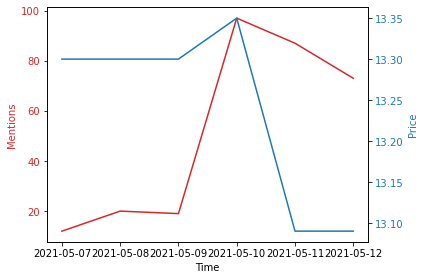

In [24]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(ge_mentions['Date'], ge_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(ge_mentions['Date'], ge_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


### r/stocks

In [25]:
# Correlation matrix
corrmat = stocks_mentions.corr()
corrmat

,Mentions,Price
Mentions,1.000000,-0.484304
Price,-0.484304,1.000000


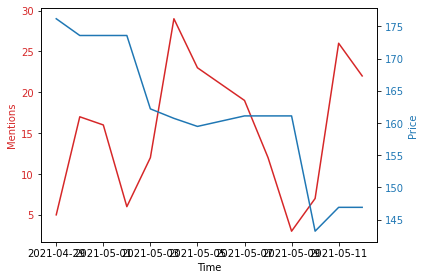

In [56]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Mentions', color=color)
ax1.plot(stocks_mentions['Date'], stocks_mentions['Mentions'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)  # we already handled the x-label with ax1
ax2.plot(stocks_mentions['Date'], stocks_mentions['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
